In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [58]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f9c2076faf0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


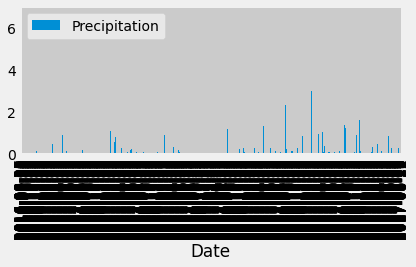

In [146]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(year_ago)
# Perform a query to retrieve the data and precipitation scores
precipitations = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > year_ago).all()

precipitation_year = [{"Date": precipitation[1], "Precipitation": precipitation[0]} for precipitation in precipitations]
precipitation_year
# Save the query results as a Pandas DataFrame and set the index to the date column
Precipitation_Year_DF = pd.DataFrame(precipitation_year).set_index("Date")
Precipitation_Year_DF.head(25)

# Sort the dataframe by date
Precipitation_Year_DF.sort_values(by = ['Date'], axis = 0, ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_Year_DF.plot.bar()
plt.tight_layout()
plt.show()
# Student: was not able to figure out how to bin dates appropriately to show a readable graph, i.e.
# way too many dates listed on the x-axis.

In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_Year_DF.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [93]:
# Design a query to calculate the total number stations in the dataset
first_row = session.query(Station).first()
first_row.__dict__
result = session.query(Station.station).count()
print(f'There are {result} stations')

There are 9 stations


In [128]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
stations_active = [{'Station':station[0], 'Date': station[1], 'Precipitation': station[2], 'Temperature': station[3]} for station in stations]
stations_active
stations_active_df = pd.DataFrame(stations_active).set_index('Station')
stations_active_df.groupby(level=0).count().sort_values(by = ['Precipitation'], axis = 0, ascending = False)


# Save the query results as a Pandas DataFrame and set the index to the date column

,Date,Precipitation,Temperature
Station,,,
USC00519281,2772,2772,2772
USC00513117,2709,2696,2709
USC00519397,2724,2685,2724
USC00519523,2669,2572,2669
USC00516128,2612,2484,2612
USC00514830,2202,1937,2202
USC00511918,1979,1932,1979
USC00517948,1372,683,1372
USC00518838,511,342,511


In [134]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_data = stations_active_df.loc['USC00519281'].max(axis = 0, skipna = True)
min_data = stations_active_df.loc['USC00519281'].min(axis = 0, skipna = True)
mean_data = stations_active_df.loc['USC00519281'].mean(axis = 0, skipna = True)
print(f'max values are as follows: {max_data}')
print(f'min values are as follows: {min_data}')
print(f'mean values are as follows: {mean_data}')


max values are as follows: Date             2017-08-18
Precipitation          9.64
Temperature            85.0
dtype: object
min values are as follows: Date             2010-01-01
Precipitation           0.0
Temperature            54.0
dtype: object
mean values are as follows: Precipitation     0.212352
Temperature      71.663781
dtype: float64


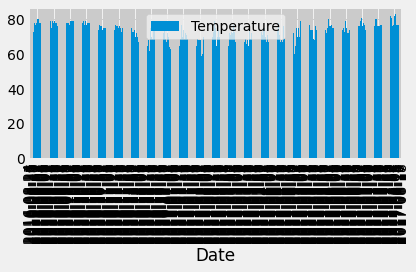

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date > year_ago).filter(Measurement.station == 'USC00519281').all()

temperatures_year = [{"Date": temperature[0], "Temperature": temperature[1]} for temperature in temperatures]
temperatures_year
# Save the query results as a Pandas DataFrame and set the index to the date column
Temperature_Year_DF = pd.DataFrame(temperatures_year).set_index("Date")
Temperature_Year_DF.head(25)

# Sort the dataframe by date
Temperature_Year_DF.sort_values(by = ['Date'], axis = 0, ascending = True)

# Histogram
# bins = ['2016,8-23', '2016-9-23', '2016-10-23', '2016-11-23', '2016-12-23', '2017-1-23', '2017-2-23', '2017-3-23', '2017-4-23', '2017-5-23', 
#         '2017-6-23', '2017-7-23', '2017-8-23']
# group_names = ["Aug '16", "Sep '16", "Oct '16", "Nov '16", "Dec '16", "Jan '17'", "Feb '17", "Mar '17", "Apr '17", 
#                "May '17", "Jun '17", "Jul '17", "Aug '17" ]
# Temperature_Year_DF["Avg Temperature"] = pd.cut(Temperature_Year_DF['Date'], bins, labels = group_names, include_lowest = True)
# Student: unable to bin properly
Temperature_Year_DF.plot.bar()
plt.tight_layout()
plt.show()

# Close session

In [148]:
# Close Session
session.close()